In [1]:
!pip install --quiet permutation_test permute arch

zsh:1: command not found: pip


In [2]:
from IPython.display import display, HTML
from zlib import crc32
import pandas as pd
import numpy as np

In [3]:
def generate_task(code):
    rs = np.random.RandomState(code)
    tasks = pd.read_csv(
        'https://drive.google.com/uc?id=1A21iabANtgSdH0yPcThXxXroQ1U6OuCH')
    
    type_to_id = dict()
    for i in range(len(tasks)):
        _type = tasks.loc[i]['code'].split('_')[0]
        if _type not in type_to_id:
            type_to_id[_type] = []
        type_to_id[_type].append(i)
    items = []
    for _type in type_to_id:
      _id = rs.choice(type_to_id[_type])
      items.append({'task': tasks.loc[_id]['task'],
                    'data': tasks.loc[_id]['data']})
    return items

In [4]:
task = dict()
task['mail'] = input(prompt='Enter your mail: ')
task['id'] = crc32(task['mail'].encode('utf-8'))
task['tasks'] = generate_task(task['id'])

task

Enter your mail: puchkov.k@phystech.edu


{'mail': 'puchkov.k@phystech.edu',
 'id': 3366284282,
 'tasks': [{'task': 'При разливе молока по бутылкам объемом 900мл на производстве допускается погрешность на уровне 50мл. Для проверки партии доступна информация о объемах молока в 20 бутылках из партии. Требуется проверить, что партия удовлетворяет требованиям производства. Предполагается, что во время работы все оборудования работает в одинаковом режиме на протяжении разлива всей партии.',
   'data': '1nyEHnO9n1I4G-qB-a2XKXVsRLGyb6O-R'},
  {'task': 'В рамках социального эксперимента проводился опрос жителей города о их времени провождения в общественном транспорте каждый день. Требуется проверить гипотезу о том, что среднее время провождения жителей в общественном транспорте составляет 2 часа.',
   'data': '1_TB98UpNgC2EZ5b-tXKKh1HEZRv-X2l1'},
  {'task': 'Исследуется влияние лекарства на людей в различных дозировках. Для каждой дозировки проверяется гипотеза, что препарат оказывает положительный эффект на состояние испыуемых. Выбо

# Задача №1

In [6]:
task_numder = 1
if task['tasks'][task_numder-1]['data'] != '-':
    dataset = pd.read_csv(
        'https://drive.google.com/uc?id={}'.format(
            task['tasks'][task_numder-1]['data']), header=None)
    print('dataset loaded')
else:
    dataset = pd.DataFrame(['not', 'required'])
    print('dataset is not required')
display(HTML('<h3>'+task['tasks'][task_numder-1]['task']+'</h3>'))

dataset loaded


## Решение задачи

In [7]:
dataset.sample(5)

,0
2,924.468450
13,903.041875
10,903.601089
19,878.647607
15,908.341858


In [8]:
dataset.describe()

,0
count,20.000000
mean,914.233365
std,21.806729
min,875.568053
25%,901.636289
50%,910.134446
75%,927.440547
max,956.022330


In [15]:
import scipy.stats as st

mu = 900
std = 50
n = 20
mean = dataset.mean()

Z = (mean - mu) / (std/ np.sqrt(n))
p = 2 * (1 - st.distributions.norm(0, 1).cdf(np.abs(Z)))
p[0]

0.20299290113411295

**Нулевая гипотеза**: партия удовлетворяет требованиям производства. Считаем, что $\alpha=0.05$.

Полученное $p-value$=0.2. Следовательно, данные не противоречат гипотезе!

# Задача №2

In [16]:
task_numder = 2
if task['tasks'][task_numder-1]['data'] != '-':
    dataset = pd.read_csv(
        'https://drive.google.com/uc?id={}'.format(
            task['tasks'][task_numder-1]['data']), header=None)
    print('dataset loaded')
else:
    dataset = pd.DataFrame(['not', 'required'])
    print('dataset is not required')
display(HTML('<h3>'+task['tasks'][task_numder-1]['task']+'</h3>'))

dataset loaded


## Решение задачи

In [17]:
dataset.describe()

,0
count,1000.000000
mean,2.684836
std,0.724985
min,0.046143
25%,2.301580
50%,2.777360
75%,3.164003
max,5.759355


In [18]:
st.shapiro(dataset)

ShapiroResult(statistic=0.9689891338348389, pvalue=8.966097178944588e-14)

$p-value$ близко к нулю $\rightarrow$ нулевая гипотеза о принадлежности данных к нормальному распределению отвергается!

Если бы предыдущий критерий показал, что данные нормальные, то можно было бы воспользоваться параметрическими критериями: $z-test$ или $t-test$.

Но это не так, значит использую либо критерий знаков, либо перестановочный критерий.

Перестановочный критерий (```one_sample```): равность матожидания нулю.

In [26]:
dataset[0]

0      3.764052
1      3.400157
2      2.978738
3      4.240893
4      3.867558
         ...   
995    3.412871
996    2.801601
997    3.094192
998    1.852389
999    2.641886
Name: 0, Length: 1000, dtype: float64

In [43]:
# критерий знаков
from statsmodels.stats.descriptivestats import sign_test
sign_test(dataset[0] - 2)[1]

0.001953125

**Нулевая гипотеза отвергается!**

Однако они все проверяет только медианы выборок (на семинаре больше не давали, а за тест больше не нашел).

# Задача №3

In [27]:
task_numder = 3
if task['tasks'][task_numder-1]['data'] != '-':
    dataset = pd.read_csv(
        'https://drive.google.com/uc?id={}'.format(
            task['tasks'][task_numder-1]['data']), header=None)
    print('dataset loaded')
else:
    dataset = pd.DataFrame(['not', 'required'])
    print('dataset is not required')
display(HTML('<h3>'+task['tasks'][task_numder-1]['task']+'</h3>'))

dataset loaded


## Решение задачи

In [31]:
dataset.describe()

,0
count,10.000000
mean,0.052014
std,0.031587
min,0.005808
25%,0.021065
50%,0.059989
75%,0.072601
max,0.095071


In [34]:
dataset.sample(5)

,0
2,0.073199
3,0.059866
4,0.015602
9,0.070807
8,0.060112


In [40]:
def plot_diff_alpha(p_values, loc_plt=None):
    '''
    Функция для отрисовки модифицированых, отсортированых 
    уровней значимости для модельной выборки.
    
    param: p_values --- список уровней значимости
    param: loc_plt --- объект matplotlib.pylab где производится отрисовка
    
    return: loc_plt --- объект matplotlib.pylab после отрисовки
    '''
    if loc_plt is None:
        return None
    argsorted_p = np.argsort(p_values)
    false = []
    true = []
    for i, id in enumerate(argsorted_p):   
        if id>m0:
            false.append((i, p_values[id]))
        else:
            true.append((i, p_values[id]))
    
    loc_plt.scatter(*zip(*true), label='True hypothesis', c='b')
    loc_plt.scatter(*zip(*false), label='False hypothesis', c='r')
    loc_plt.xlabel('sorted i')
    loc_plt.ylabel('$\hat{p}(i)$')
    loc_plt.legend(loc='best')
    
    return loc_plt

TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'

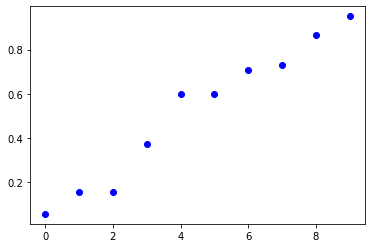

In [41]:
import matplotlib.pylab as plt

p_values = multipletests(dataset[0], method='bonferroni')[1]

plot_diff_alpha(p_values, loc_plt=plt)
#plt.plot(np.arange(0, m), [0.05]*200)
plt.show()

TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'

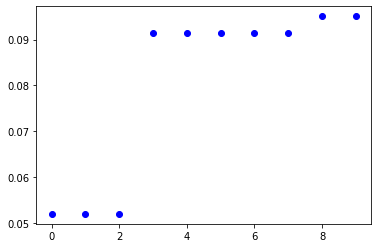

In [46]:
p_values = multipletests(dataset[0], method='fdr_bh')[1]

plot_diff_alpha(p_values, loc_plt=plt)
#plt.plot(np.arange(0, m), [0.05]*200)
plt.show()

Последнее и есть ответ